# <center>BMIN-521-HW4
#### <center>by Keshav Patil@UPenn
---

In [2]:
# Import required library
import numpy as np # scientific computing; https://cs231n.github.io/python-numpy-tutorial/
import pandas as pd # data manipulation and analysis; offers data structures and operations.
import seaborn as sns
import matplotlib.pyplot as plt
import os # interact and get Operating System information 

## Problem 1 

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import timeit

In [5]:
tf.__version__


'1.14.0'

### 1 a

### loading the CIFAR dataset

In [4]:
(X_train_full, y_train_full), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train_full.shape

(50000, 32, 32, 3)

In [6]:
X_train = X_train_full[10000:20000]
y_train = y_train_full[10000:20000]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]
X_TEST = X_test[:5000]
y_TEST = Y_test[:5000]

### 1 b

### Building the DNN model

In [7]:
tf.random.set_seed(30)
np.random.seed(30)

In [8]:
# building the dnn architecture and also including the hyperparameter tuning where the hyperparameters are
# number of layers, number of neurons in each layer, activation type and optimzer type
 
n_layers = [10,12,15]                  # [10,12,15]
n_neurons = [20,22,25]                 # [20,22,25]
activation_type = ["elu","relu"]       # ["elu", "relu"]
optimize = [1,2]                       # 1 = Adam, 2 = Nadam

valid_loss = 10
n_l = 0
n_n = 0
a_t = 0
o_t = 0

start = timeit.timeit()

for i in range(0,len(n_neurons)):
    for j in range(0,len(activation_type)):
        for op_t in range(0,len(optimize)):
            for nl_t in range(0,len(n_layers)):
                keras.backend.clear_session()  # clearing the memory of earlier dnn architectures (if any)
                model = keras.models.Sequential() # For the sequential stack of layers that would be created

                # Making the first layer which is to flatten the input so that each feature  finds a neuron 
                model.add(keras.layers.Flatten(input_shape=[32,32,3]))
            
                
                # building the dnn layers
                for l in range(0,n_layers[nl_t]):
                     model.add(keras.layers.Dense(n_neurons[i], activation=activation_type[j], kernel_initializer="he_normal"))

                # adding the last layer : softmax
                model.add(keras.layers.Dense(10,activation="softmax"))

                # check on the type of optimizer
                if op_t == 0:
                    optimizer = keras.optimizers.Adam(learning_rate=0.001)
                if op_t == 1:
                    optimizer = keras.optimizers.Nadam(learning_rate=0.001)

                

                # compiling the model that we architectured
                model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

                # creating the callbacks needed for early dropout while training the model
                # looking at 10 straight epochs to see wherre to early stop
                early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

                # creating a checkpoint so that the parameters at the best epoch (lowest validation score) are stored
                model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_dnn.h5", save_best_only=True)

                # define the callbacks
                callbacks = [early_stopping_cb, model_checkpoint_cb]

                # fit the model
                dnn = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid), callbacks=callbacks)

                # Now let's load the model with best parameters (at the particular epoch with lowest validation error)
                model = keras.models.load_model("my_cifar10_dnn.h5")
                

                # evaluate on the validation set
                val_loss_temp = model.evaluate(X_valid, y_valid)[0]

                if val_loss_temp < valid_loss:

                    # storing the lowest val_loss obtained through hyperparameter tuning
                    valid_loss = val_loss_temp

                    # storing the number of layers obtained through hyperparameter tuning
                    n_l = n_layers[nl_t] # it got incremented earlier

                    # storing the number of neurons obtained through hyperparameter tuning 
                    n_n = n_neurons[i]

                    # storing the activation type based on hyperparameter tuning
                    a_t = j

                    # storing the optimizer based on hyperparameter tuning
                    o_t = op_t 

end = timeit.timeit()        
        
print('The lowest validation loss obtained through tuned hyperparameters is {}'.format(valid_loss))
print('The number of layers  through tuning is {}'.format(n_l))
print('The number of neurons through tuning is {}'.format(n_n))
print('The activation type {}'.format(activation_type[a_t]))
print('The optimizer is {}'.format(o_t))
print('The time for hyperparameter tuning is {} sec'.format(end-start))

Train on 10000 samples, validate on 5000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 147us/sample - loss: 7.3016 - accuracy: 0.0985 - val_loss: 2.3120 - val_accuracy: 0.1044
Epoch 2/100
10000/10000 [==============================] - 1s 75us/sample - loss: 2.3116 - accuracy: 0.0938 - val_loss: 2.3126 - val_accuracy: 0.1028
Epoch 3/100
10000/10000 [==============================] - 1s 110us/sample - loss: 2.3119 - accuracy: 0.1008 - val_loss: 2.3142 - val_accuracy: 0.1040
Epoch 4/100
10000/10000 [==============================] - 1s 91us/sample - loss: 2.3096 - accuracy: 0.0997 - val_loss: 2.3106 - val_accuracy: 0.0972
Epoch 5/100
10000/10000 [==============================] - 1s 103us/sample - loss: 2.3070 - accuracy: 0.1010 - val_loss: 2.3212 - val_accuracy: 0.1038
Epoch 6/100
10000/10000 [==============================] - 1s 77us/sample - loss: 2.3067 - accuracy: 0.0997 - val_loss: 2.3126 - val_accuracy: 0.1040
Epoch 7/100
10000/10000 [=======================

10000/10000 [==============================] - 4s 407us/sample - loss: 4.3548 - accuracy: 0.1420 - val_loss: 2.2493 - val_accuracy: 0.1546
Epoch 2/100
10000/10000 [==============================] - 2s 246us/sample - loss: 2.2136 - accuracy: 0.1757 - val_loss: 2.0965 - val_accuracy: 0.2170
Epoch 3/100
10000/10000 [==============================] - 1s 123us/sample - loss: 2.1356 - accuracy: 0.1982 - val_loss: 2.2492 - val_accuracy: 0.1810
Epoch 4/100
10000/10000 [==============================] - 1s 79us/sample - loss: 2.0868 - accuracy: 0.2081 - val_loss: 2.1035 - val_accuracy: 0.1972
Epoch 5/100
10000/10000 [==============================] - 1s 86us/sample - loss: 2.0503 - accuracy: 0.2259 - val_loss: 2.0485 - val_accuracy: 0.2184
Epoch 6/100
10000/10000 [==============================] - 1s 85us/sample - loss: 2.0219 - accuracy: 0.2305 - val_loss: 1.9830 - val_accuracy: 0.2322
Epoch 7/100
10000/10000 [==============================] - 1s 80us/sample - loss: 2.0047 - accuracy: 0.2327 -

10000/10000 [==============================] - 1s 111us/sample - loss: 1.8725 - accuracy: 0.3023 - val_loss: 1.9054 - val_accuracy: 0.2858
Epoch 16/100
10000/10000 [==============================] - 1s 114us/sample - loss: 1.8734 - accuracy: 0.3070 - val_loss: 1.9288 - val_accuracy: 0.2782
Epoch 17/100
10000/10000 [==============================] - 1s 109us/sample - loss: 1.8567 - accuracy: 0.3124 - val_loss: 1.8861 - val_accuracy: 0.2988
Epoch 18/100
10000/10000 [==============================] - 1s 111us/sample - loss: 1.8452 - accuracy: 0.3224 - val_loss: 1.9038 - val_accuracy: 0.2982
Epoch 19/100
10000/10000 [==============================] - 1s 122us/sample - loss: 1.9154 - accuracy: 0.2942 - val_loss: 2.1360 - val_accuracy: 0.2116
Epoch 20/100
10000/10000 [==============================] - 1s 116us/sample - loss: 1.9576 - accuracy: 0.2680 - val_loss: 1.9387 - val_accuracy: 0.2584
Epoch 21/100
10000/10000 [==============================] - 1s 113us/sample - loss: 1.9134 - accuracy

10000/10000 [==============================] - 1s 83us/sample - loss: 1.9449 - accuracy: 0.2682 - val_loss: 2.0270 - val_accuracy: 0.2310
Epoch 22/100
10000/10000 [==============================] - 1s 99us/sample - loss: 1.9417 - accuracy: 0.2632 - val_loss: 1.9079 - val_accuracy: 0.2770
Epoch 23/100
10000/10000 [==============================] - 1s 93us/sample - loss: 1.9453 - accuracy: 0.2660 - val_loss: 1.9469 - val_accuracy: 0.2612
Epoch 24/100
10000/10000 [==============================] - 1s 80us/sample - loss: 1.9566 - accuracy: 0.2594 - val_loss: 1.9297 - val_accuracy: 0.2628
Epoch 25/100
10000/10000 [==============================] - 1s 79us/sample - loss: 1.9338 - accuracy: 0.2706 - val_loss: 1.9723 - val_accuracy: 0.2704
Epoch 26/100
10000/10000 [==============================] - 1s 84us/sample - loss: 1.9308 - accuracy: 0.2685 - val_loss: 1.9773 - val_accuracy: 0.2628
Epoch 27/100
10000/10000 [==============================] - 1s 92us/sample - loss: 1.9478 - accuracy: 0.269

10000/10000 [==============================] - 1s 77us/sample - loss: 1.9612 - accuracy: 0.2524 - val_loss: 1.9482 - val_accuracy: 0.2454
Epoch 28/100
10000/10000 [==============================] - 1s 87us/sample - loss: 1.9383 - accuracy: 0.2609 - val_loss: 1.9254 - val_accuracy: 0.2524
Epoch 29/100
10000/10000 [==============================] - 1s 100us/sample - loss: 1.9223 - accuracy: 0.2677 - val_loss: 1.9181 - val_accuracy: 0.2762
Epoch 30/100
10000/10000 [==============================] - 1s 95us/sample - loss: 1.9279 - accuracy: 0.2571 - val_loss: 1.9169 - val_accuracy: 0.2572
Epoch 31/100
10000/10000 [==============================] - 1s 127us/sample - loss: 1.9206 - accuracy: 0.2703 - val_loss: 1.9085 - val_accuracy: 0.2624
Epoch 32/100
10000/10000 [==============================] - 1s 115us/sample - loss: 1.9262 - accuracy: 0.2649 - val_loss: 1.9573 - val_accuracy: 0.2476
Epoch 33/100
10000/10000 [==============================] - 2s 157us/sample - loss: 1.9149 - accuracy: 0

10000/10000 [==============================] - 1s 129us/sample - loss: 2.0108 - accuracy: 0.2337 - val_loss: 2.0050 - val_accuracy: 0.2406
Epoch 7/100
10000/10000 [==============================] - 1s 113us/sample - loss: 2.0023 - accuracy: 0.2405 - val_loss: 2.0674 - val_accuracy: 0.2376
Epoch 8/100
10000/10000 [==============================] - 1s 125us/sample - loss: 2.0019 - accuracy: 0.2467 - val_loss: 1.9354 - val_accuracy: 0.2652
Epoch 9/100
10000/10000 [==============================] - 1s 132us/sample - loss: 1.9559 - accuracy: 0.2590 - val_loss: 1.9497 - val_accuracy: 0.2650
Epoch 10/100
10000/10000 [==============================] - 1s 121us/sample - loss: 1.9500 - accuracy: 0.2629 - val_loss: 1.9819 - val_accuracy: 0.2642
Epoch 11/100
10000/10000 [==============================] - 1s 124us/sample - loss: 1.9548 - accuracy: 0.2620 - val_loss: 1.9256 - val_accuracy: 0.2804
Epoch 12/100
10000/10000 [==============================] - 1s 115us/sample - loss: 1.9357 - accuracy: 0

10000/10000 [==============================] - 1s 113us/sample - loss: 1.7293 - accuracy: 0.3683 - val_loss: 1.8412 - val_accuracy: 0.3366
Epoch 61/100
10000/10000 [==============================] - 2s 187us/sample - loss: 1.7294 - accuracy: 0.3741 - val_loss: 1.8345 - val_accuracy: 0.3312
Epoch 62/100
5000/5000 [==============================] - 0s 69us/sample - loss: 1.8208 - accuracy: 0.3442
Train on 10000 samples, validate on 5000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 131us/sample - loss: 7.1987 - accuracy: 0.0976 - val_loss: 2.3030 - val_accuracy: 0.0972
Epoch 2/100
10000/10000 [==============================] - 1s 79us/sample - loss: 2.3029 - accuracy: 0.1012 - val_loss: 2.3028 - val_accuracy: 0.0972
Epoch 3/100
10000/10000 [==============================] - 1s 89us/sample - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 4/100
10000/10000 [==============================] - 1s 81us/sample - loss: 2.3028 - accuracy: 0

10000/10000 [==============================] - 1s 119us/sample - loss: 2.2980 - accuracy: 0.1273 - val_loss: 2.1556 - val_accuracy: 0.1592
Epoch 4/100
10000/10000 [==============================] - 1s 136us/sample - loss: 2.1487 - accuracy: 0.1609 - val_loss: 2.0904 - val_accuracy: 0.1890
Epoch 5/100
10000/10000 [==============================] - 1s 112us/sample - loss: 2.1211 - accuracy: 0.1736 - val_loss: 2.0909 - val_accuracy: 0.1894
Epoch 6/100
10000/10000 [==============================] - 1s 128us/sample - loss: 2.0968 - accuracy: 0.1780 - val_loss: 2.0799 - val_accuracy: 0.1900
Epoch 7/100
10000/10000 [==============================] - 2s 161us/sample - loss: 2.0942 - accuracy: 0.1811 - val_loss: 2.0604 - val_accuracy: 0.1994
Epoch 8/100
10000/10000 [==============================] - 1s 118us/sample - loss: 2.0790 - accuracy: 0.1912 - val_loss: 2.0478 - val_accuracy: 0.2094
Epoch 9/100
10000/10000 [==============================] - 1s 111us/sample - loss: 2.0715 - accuracy: 0.19

10000/10000 [==============================] - 1s 83us/sample - loss: 1.8072 - accuracy: 0.3305 - val_loss: 1.9443 - val_accuracy: 0.2718
Epoch 37/100
10000/10000 [==============================] - 1s 95us/sample - loss: 1.7953 - accuracy: 0.3416 - val_loss: 1.8172 - val_accuracy: 0.3300
Epoch 38/100
10000/10000 [==============================] - 1s 92us/sample - loss: 1.8065 - accuracy: 0.3330 - val_loss: 1.8207 - val_accuracy: 0.3214
Epoch 39/100
10000/10000 [==============================] - 1s 85us/sample - loss: 1.7912 - accuracy: 0.3370 - val_loss: 1.8407 - val_accuracy: 0.3162
Epoch 40/100
10000/10000 [==============================] - 1s 88us/sample - loss: 1.7874 - accuracy: 0.3443 - val_loss: 1.8869 - val_accuracy: 0.3090
Epoch 41/100
10000/10000 [==============================] - 1s 104us/sample - loss: 1.7790 - accuracy: 0.3441 - val_loss: 1.8259 - val_accuracy: 0.3276
Epoch 42/100
10000/10000 [==============================] - 1s 82us/sample - loss: 1.7861 - accuracy: 0.34

10000/10000 [==============================] - 1s 119us/sample - loss: 1.7852 - accuracy: 0.3429 - val_loss: 1.8096 - val_accuracy: 0.3392
Epoch 33/100
10000/10000 [==============================] - 1s 112us/sample - loss: 1.7769 - accuracy: 0.3520 - val_loss: 1.8727 - val_accuracy: 0.3254
Epoch 34/100
10000/10000 [==============================] - 1s 113us/sample - loss: 1.7767 - accuracy: 0.3497 - val_loss: 1.8862 - val_accuracy: 0.3122
Epoch 35/100
10000/10000 [==============================] - 1s 111us/sample - loss: 1.7691 - accuracy: 0.3528 - val_loss: 1.8645 - val_accuracy: 0.3234
Epoch 36/100
10000/10000 [==============================] - 1s 111us/sample - loss: 1.7649 - accuracy: 0.3530 - val_loss: 1.9135 - val_accuracy: 0.3212
Epoch 37/100
10000/10000 [==============================] - 1s 113us/sample - loss: 1.7666 - accuracy: 0.3534 - val_loss: 1.8222 - val_accuracy: 0.3372
Epoch 38/100
10000/10000 [==============================] - 1s 112us/sample - loss: 1.7596 - accuracy

5000/5000 [==============================] - 0s 56us/sample - loss: 2.0183 - accuracy: 0.2228
Train on 10000 samples, validate on 5000 samples
Epoch 1/100
10000/10000 [==============================] - 2s 227us/sample - loss: 7.2162 - accuracy: 0.1147 - val_loss: 2.2761 - val_accuracy: 0.1700
Epoch 2/100
10000/10000 [==============================] - 1s 99us/sample - loss: 2.2621 - accuracy: 0.1523 - val_loss: 2.2117 - val_accuracy: 0.1628
Epoch 3/100
10000/10000 [==============================] - 1s 99us/sample - loss: 2.1957 - accuracy: 0.1731 - val_loss: 2.1314 - val_accuracy: 0.1686
Epoch 4/100
10000/10000 [==============================] - 1s 100us/sample - loss: 2.1371 - accuracy: 0.1873 - val_loss: 2.0677 - val_accuracy: 0.2034
Epoch 5/100
10000/10000 [==============================] - 1s 95us/sample - loss: 2.1022 - accuracy: 0.1956 - val_loss: 2.0990 - val_accuracy: 0.1952
Epoch 6/100
10000/10000 [==============================] - 1s 95us/sample - loss: 2.0833 - accuracy: 0.19

In [9]:
# using the tuned hyperparameters for further computations
n_layers = 15                          # [10,12,15]
n_neurons = 25                         # [20,22,25]
activation_type = "elu"                # ["elu", "relu"]
optimize = 1                           # 1 = Adam, 2 = Nadam

In [10]:
# training with tuned hyperparameters
keras.backend.clear_session()  # clearing the memory of earlier dnn architectures (if any)
model = keras.models.Sequential() # For the sequential stack of layers that would be created

# Making the first layer which is to flatten the input so that each feature  finds a neuron 
model.add(keras.layers.Flatten(input_shape=[32,32,3]))


# building the dnn layers
for l in range(0,n_layers):
     model.add(keras.layers.Dense(n_neurons, activation=activation_type, kernel_initializer="he_normal"))

# adding the last layer : softmax
model.add(keras.layers.Dense(10,activation="softmax"))

# check on the type of optimizer
if optimize == 1:
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
if optimize == 2:
    optimizer = keras.optimizers.Nadam(learning_rate=0.001)



# compiling the model that we architectured
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

# creating the callbacks needed for early dropout while training the model
# looking at 10 straight epochs to see wherre to early stop
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# creating a checkpoint so that the parameters at the best epoch (lowest validation score) are stored
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_dnn.h5", save_best_only=True)

# define the callbacks
callbacks = [early_stopping_cb, model_checkpoint_cb]

# fit the model
dnn = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid), callbacks=callbacks)

# Now let's load the model with best parameters (at the particular epoch with lowest validation error)
model = keras.models.load_model("my_cifar10_dnn.h5")




Train on 10000 samples, validate on 5000 samples
Epoch 1/100
10000/10000 [==============================] - 2s 174us/sample - loss: 4.3828 - accuracy: 0.1340 - val_loss: 2.2617 - val_accuracy: 0.1632
Epoch 2/100
10000/10000 [==============================] - 1s 99us/sample - loss: 2.2215 - accuracy: 0.1625 - val_loss: 2.1419 - val_accuracy: 0.1884
Epoch 3/100
10000/10000 [==============================] - 1s 96us/sample - loss: 2.1486 - accuracy: 0.1892 - val_loss: 2.0401 - val_accuracy: 0.2322
Epoch 4/100
10000/10000 [==============================] - 1s 96us/sample - loss: 2.0456 - accuracy: 0.2271 - val_loss: 1.9770 - val_accuracy: 0.2634
Epoch 5/100
10000/10000 [==============================] - 1s 93us/sample - loss: 2.0242 - accuracy: 0.2392 - val_loss: 2.1918 - val_accuracy: 0.1916
Epoch 6/100
10000/10000 [==============================] - 1s 99us/sample - loss: 1.9871 - accuracy: 0.2518 - val_loss: 1.9330 - val_accuracy: 0.2708
Epoch 7/100
10000/10000 [=========================

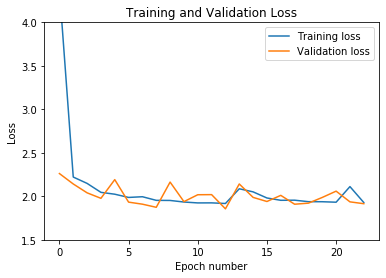

In [12]:
plt.plot(dnn.history['loss'], label='Training loss')
plt.plot(dnn.history['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('1.png')
plt.ylim((1.5,4))
plt.show()

In [13]:
# Training, Validation and testing accuracy

# training accuracy
Train_acc = model.evaluate(X_train,y_train)[1]
print('The training accuracy is {}'.format(Train_acc))

# validation accuracy
Valid_acc = model.evaluate(X_valid,y_valid)[1]
print('The validation accuracy is {}'.format(Valid_acc))

# testing accuracy
Test_acc = model.evaluate(X_TEST,y_TEST)[1]
print('The testing accuracy is {}'.format(Test_acc))


10000/10000 [==============================] - 1s 51us/sample - loss: 1.8388 - accuracy: 0.3293
The training accuracy is 0.3292999863624573
5000/5000 [==============================] - 0s 38us/sample - loss: 1.8560 - accuracy: 0.3184
The validation accuracy is 0.31839999556541443
5000/5000 [==============================] - 0s 37us/sample - loss: 1.8634 - accuracy: 0.3094
The testing accuracy is 0.3093999922275543


#### The accuracy is quite low due to thelow size of the training set and this is a dnn and not cnn

## Problem 2

### 2 a CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [8]:
# normalization
X_train_full = X_train_full/255.0
X_test = X_test/255.0

# setting the training and validation set
X_train, X_valid = X_train_full[5000:10000], X_train_full[:500]
y_train, y_valid = y_train_full[5000:10000], y_train_full[:500]
X_TEST, y_TEST = X_test[5000:6000], y_test[5000:6000]

In [75]:
# defining the CNN architecture

# hyperparameter tuning 
# number of fully connected layers
# number of neurons in them 

n_neurons = [100,120]
n_layers = [1,3]
valid_loss = 100 # just some big number

for i in range(0,len(n_neurons)):
        
    for nl_t in range(0,len(n_layers)):
        keras.backend.clear_session()  # clearing the memory of earlier dnn architectures (if any)
         
        # CNN architecture without the fully connected layers    
        model = Sequential()
        model.add(Conv2D(40,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
        model.add(Conv2D(70,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Flatten())
        model.add(Dropout(0.25))

        # building the fully connected  layers
        for l in range(0,n_layers[nl_t]):
            model.add(Dense(n_neurons[i],activation="relu"))
            model.add(Dropout(0.5))
             

                
        # last layer or the prediction layer
        model.add(Dense(10,activation="softmax"))
        
        model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
        
        # creating callbacks for early stopping
        early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
        model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_cnn.h5", save_best_only=True)
        callbacks = [early_stopping_cb, model_checkpoint_cb]

       
    
         # fit the model
        train_cnn = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid), callbacks=callbacks)

        # Now let's load the model with best parameters (at the particular epoch with lowest validation error)
        model = keras.models.load_model("my_cifar10_cnn.h5")
                

        # evaluate on the validation set
        val_loss_temp = model.evaluate(X_valid, y_valid)[0]
        
        

        if val_loss_temp < valid_loss:

            # storing the lowest val_loss obtained through hyperparameter tuning
            valid_loss = val_loss_temp

            # storing the number of layers obtained through hyperparameter tuning
            n_l = n_layers[nl_t] # it got incremented earlier

            # storing the number of neurons obtained through hyperparameter tuning 
            n_n = n_neurons[i]

                        
      
        





Train on 5000 samples, validate on 500 samples
Epoch 1/20
5000/5000 [==============================] - 24s 5ms/sample - loss: 2.0997 - acc: 0.2224 - val_loss: 1.8696 - val_acc: 0.3240
Epoch 2/20
5000/5000 [==============================] - 19s 4ms/sample - loss: 1.7309 - acc: 0.3646 - val_loss: 1.4840 - val_acc: 0.4740
Epoch 3/20
5000/5000 [==============================] - 20s 4ms/sample - loss: 1.5293 - acc: 0.4334 - val_loss: 1.3776 - val_acc: 0.5080
Epoch 4/20
5000/5000 [==============================] - 24s 5ms/sample - loss: 1.3781 - acc: 0.4980 - val_loss: 1.3278 - val_acc: 0.4980
Epoch 5/20
5000/5000 [==============================] - 21s 4ms/sample - loss: 1.2442 - acc: 0.5454 - val_loss: 1.3211 - val_acc: 0.5100
Epoch 6/20
5000/5000 [==============================] - 20s 4ms/sample - loss: 1.1481 - acc: 0.5868 - val_loss: 1.4479 - val_acc: 0.5020
Epoch 7/20
5000/5000 [==============================] - 19s 4ms/sample - loss: 1.0225 - acc: 0.6286 - val_loss: 1.4590 - val_acc: 0

In [76]:
print('The lowest validation loss obtained through tuned hyperparameters is {}'.format(valid_loss))
print('The number of layers  through tuning is {}'.format(n_l))
print('The number of neurons through tuning is {}'.format(n_n))

The lowest validation loss obtained through tuned hyperparameters is 1.2938534154891967
The number of layers  through tuning is 1
The number of neurons through tuning is 100


In [77]:
 val_loss_temp

1.3156351490020752

In [9]:
# now using the tuned hyperparameters

keras.backend.clear_session()  # clearing the memory of earlier dnn architectures (if any)
         
# CNN architecture without the fully connected layers    
model = Sequential()
model.add(Conv2D(40,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
model.add(Conv2D(70,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.5))

# last layer or the prediction layer
model.add(Dense(10,activation="softmax"))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [11]:
# creating callbacks for early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_cnn.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

In [12]:
train_cnn = model.fit(X_train,y_train,epochs=100,batch_size=60,validation_data=(X_valid,y_valid), callbacks=callbacks)

Train on 5000 samples, validate on 500 samples
Epoch 1/100
5000/5000 [==============================] - 16s 3ms/sample - loss: 2.0983 - acc: 0.2320 - val_loss: 1.6782 - val_acc: 0.3800
Epoch 2/100
5000/5000 [==============================] - 16s 3ms/sample - loss: 1.7757 - acc: 0.3534 - val_loss: 1.5758 - val_acc: 0.4320
Epoch 3/100
5000/5000 [==============================] - 14s 3ms/sample - loss: 1.5838 - acc: 0.4292 - val_loss: 1.5128 - val_acc: 0.4480
Epoch 4/100
5000/5000 [==============================] - 14s 3ms/sample - loss: 1.4439 - acc: 0.4694 - val_loss: 1.3932 - val_acc: 0.5080
Epoch 5/100
5000/5000 [==============================] - 14s 3ms/sample - loss: 1.3107 - acc: 0.5268 - val_loss: 1.3303 - val_acc: 0.5400
Epoch 6/100
5000/5000 [==============================] - 14s 3ms/sample - loss: 1.1760 - acc: 0.5806 - val_loss: 1.2508 - val_acc: 0.5540
Epoch 7/100
5000/5000 [==============================] - 14s 3ms/sample - loss: 1.0804 - acc: 0.6118 - val_loss: 1.2605 - val

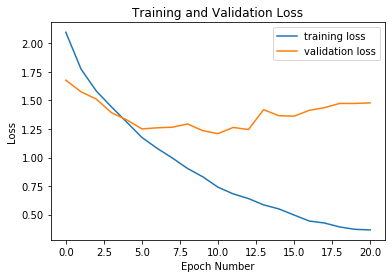

In [13]:
# plot the loss
plt.plot(train_cnn.history['loss'],label='training loss')
plt.plot(train_cnn.history['val_loss'],label='validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend()
plt.savefig('2.png')
plt.show()

In [14]:
# training, validation and testing accuracies

# training accuracy
Train_acc = model.evaluate(X_train,y_train)[1]
print('The training accuracy is {}'.format(Train_acc))

# validation accuracy
Valid_acc = model.evaluate(X_valid,y_valid)[1]
print('The validation accuracy is {}'.format(Valid_acc))

# testing accuracy
Test_acc = model.evaluate(X_TEST,y_TEST)[1]
print('The testing accuracy is {}'.format(Test_acc))


5000/5000 [==============================] - 4s 880us/sample - loss: 0.0822 - acc: 0.9946
The training accuracy is 0.9945999979972839
500/500 [==============================] - 1s 1ms/sample - loss: 1.4792 - acc: 0.6120
The validation accuracy is 0.6119999885559082
1000/1000 [==============================] - 1s 965us/sample - loss: 1.5495 - acc: 0.5750
The testing accuracy is 0.574999988079071


#### The accuracy has improved as compared to dnn

## Problem 3

#### a

In [87]:
# loading the data
shakespeare_url =  "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open (filepath) as f:
    shakespeare_text = f.read()
shakespeare_text = shakespeare_text[:20000]

In [88]:
# let's see how our text looks like
print(shakespeare_text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [89]:
# data_preprocessing
# Encode character to integer
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(shakespeare_text)

In [90]:
# collecting information on number of characters and number of distinct characters
max_id = len(tokenizer.word_index) # number of distinct characters
dataset_size = tokenizer.document_count # total number of characters
print('The number of distinct character is {}'.format(max_id))
print('The total number of  characters is {}'.format(dataset_size))

The number of distinct character is 36
The total number of  characters is 20000


In [91]:
# Encode the full text
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1

In [92]:
encoded

array([19,  4,  7, ...,  3, 18,  0])

In [93]:
# making the training set

train_size = dataset_size  * 90 // 100
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

In [94]:
# convert the long sequence to smaller windows of text
n_steps = 100 # tunable parameter, substrings made out of the sequence
window_length = n_steps+1
dataset = dataset.repeat().window(window_length, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window : window.batch(window_length)) # to convert the dataset to tensor

In [95]:
tf.random.set_seed(35)
np.random.seed(35)

In [96]:
# shuffle and batch windows
batch_size = 32
dataset = dataset.shuffle(10000).batch(batch_size)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

dataset = dataset.map(lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))

dataset = dataset.prefetch(1)
for X_batch, Y_batch in dataset.take(1):
    print(X_batch.shape, Y_batch.shape)

(32, 100, 36) (32, 100)


In [97]:
# build the architecture and train the model

model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences=True, input_shape=[None, max_id],
                     dropout=0.2, recurrent_dropout=0.2),
    keras.layers.GRU(128, return_sequences=True,
                     dropout=0.2, recurrent_dropout=0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation="softmax"))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
history = model.fit(dataset, steps_per_epoch=train_size // batch_size,
                    epochs=10)

Train for 562 steps
Epoch 1/10
562/562 [==============================] - 150s 266ms/step - loss: 2.3255
Epoch 2/10
562/562 [==============================] - 123s 219ms/step - loss: 1.7537
Epoch 3/10
562/562 [==============================] - 125s 223ms/step - loss: 1.5309
Epoch 4/10
562/562 [==============================] - 130s 232ms/step - loss: 1.4063
Epoch 5/10
562/562 [==============================] - 137s 244ms/step - loss: 1.3222
Epoch 6/10
562/562 [==============================] - 124s 220ms/step - loss: 1.2554
Epoch 7/10
562/562 [==============================] - 122s 218ms/step - loss: 1.2247
Epoch 8/10
562/562 [==============================] - 123s 219ms/step - loss: 1.1732
Epoch 9/10
562/562 [==============================] - 130s 231ms/step - loss: 1.1417
Epoch 10/10
562/562 [==============================] - 138s 245ms/step - loss: 1.1151


In [98]:
# To create the one-hot representation of the testing text
def preprocess(texts):
    X = np.array(tokenizer.texts_to_sequences(texts)) - 1
    return tf.one_hot(X, max_id)

In [107]:
# predict the next character
X_new = preprocess(["How are y"])
y_pred = model.predict_classes(X_new)
tokenizer.sequences_to_texts(y_pred+1)[0][-1]

'o'

In [100]:
# Generate our own fake Shakespearean text

def next_char(text, temperature=1):
    X_new = preprocess([text])
    y_proba = model.predict(X_new)[0, -1:, :]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1
    return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [101]:
# following function repeatedly calls next_char and then appends it to the given text

def complete_text(text, n_chars=50, temperature=1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

In [103]:
# temperature here is used to generate different instances
tf.random.set_seed(35)
# generate text
print(complete_text("th", temperature=0.2))

the belly answer?

menenius:
noble marcius shall be 


In [104]:
# generate text
print(complete_text("th", temperature=0.8))

the gods.

first citizen:
consider your own are at f


## Problem 4

#### a  Stacked Autoencoder

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from numpy import asarray
import sys

In [6]:
def reset_graph(seed=50):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    

In [7]:
# defining the plot function

def plot_image(image, shape=[28,28]):
    plt.imshow(image.reshape(shape), cmap='Greys', interpolation = "nearest")
    plt.axis('off')
    

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
(X_trainval, Y_trainval), (X_test, Y_test) = fashion_mnist.load_data()
X_trainval = X_trainval.astype('float32').reshape([-1,28*28])/255.0
X_test =  X_test.astype('float32').reshape([-1,28*28])/255.0

In [10]:
print(X_trainval.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [11]:
def shuffle_batch(X, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch = X[batch_idx]
        yield X_batch

In [37]:
# defining the stacked autoencoder with hyperparameter tuning
# hyperparameters are
# Number of hidden layers [3,5,7]
# number of units in the bottle-neck layer  [150,200,225]
# activation type ["elu", "relu"]


from functools import partial



n_h = 0
n_b = 0
a_t = 0
n_hid_layers = [3,5,7]
n_bottle_neck_units = [150,200,225]  #,200] # 200] #, 225]   # all other hidden layers apart from the bottle neck layer have 300 units fixed = n_hidden1
activation_type =  [tf.nn.elu, tf.nn.relu]
learning_rate = 0.01
l2_reg = 0.0001     # L2 regularization
n_inputs = 28*28
n_hidden1 = 300
n_outputs = n_inputs

valid_loss = 50 # just some big number, won't matter as we want the lowest value

for i in range(0,len(n_hid_layers)):
    for j in range(0,len(n_bottle_neck_units)):
        for k in range(0,len(activation_type)):




            he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
            l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
            X = tf.placeholder(tf.float32, shape=[None, n_inputs])
            my_dense_layer = partial(tf.layers.dense, activation=activation_type[k], kernel_initializer = he_init, kernel_regularizer=l2_regularizer)


            n_hidden_units = np.zeros(n_hid_layers[i])
            for l in range(0,n_hid_layers[i]):
                n_hidden_units[l] = n_hidden1

            c = int((n_hid_layers[i] + 1)/2)
            n_hidden_units[c-1] = n_bottle_neck_units[j]
            n_hidden_units = n_hidden_units.astype(int)
            hidden1 = my_dense_layer(X, n_hidden1)
            hidden2 = my_dense_layer(hidden1, n_hidden_units[1])
            hidden3 = my_dense_layer(hidden2, n_hidden_units[2])
            g = hidden3

            if n_hid_layers[i] == 5:
                hidden4 = my_dense_layer(hidden3, n_hidden_units[3])
                hidden5 = my_dense_layer(hidden4, n_hidden_units[4])
                g = hidden5
            if n_hid_layers[i] == 7:
                hidden4 = my_dense_layer(hidden3, n_hidden_units[3])
                hidden5 = my_dense_layer(hidden4, n_hidden_units[4])
                hidden6 = my_dense_layer(hidden5, n_hidden_units[5])
                hidden7 = my_dense_layer(hidden6, n_hidden_units[6])
                g = hidden7



            outputs = my_dense_layer(g, n_outputs, activation=None)


            reconstruction_loss = tf.reduce_mean(tf.square(outputs-X))
            reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
            loss = tf.add_n([reconstruction_loss] + reg_losses)  

            # optimizer and compilation
            optimizer = tf.train.AdamOptimizer(learning_rate)
            model = optimizer.minimize(loss)   


            # Model initialization
            init = tf.global_variables_initializer()
            saver = tf.train.Saver()


            # Train model
            n_epochs = 30
            batch_size = 1000
            train_loss = []
            validation_loss = []



        with tf.Session() as sess:
            init.run()
            for epoch in range(n_epochs):
                X_train, X_validation, _,_ = train_test_split(X_trainval, Y_trainval, test_size=0.1)
                for X_batch in shuffle_batch(X_train, batch_size):
                    sess.run(model, feed_dict={X:X_batch})
                loss_train = loss.eval(feed_dict={X:X_batch})
                loss_val = loss.eval(feed_dict={X:X_validation})
                #print("\r {}".format(epoch), "Train MSE:", loss_train, "Validation MSE:", loss_val)

                sys.stdout.flush()
                saver.save(sess, "./my_model_all_layers.ckpt")
                train_loss.append(loss_train)
                validation_loss.append(loss_val)



        val_loss_temp = min(validation_loss)

        if val_loss_temp < valid_loss:

            # storing the lowest val_loss obtained through hyperparameter tuning
            valid_loss = val_loss_temp

            # storing the number of hidden layers obtained through hyperparameter tuning
            n_h = n_hid_layers[i]

            # storing the number of units in the bottle-neck layer after hyperparameter tuning 
            n_b = n_bottle_neck_units[j]

            # storing the activation type based on hyperparameter tuning
            a_t = activation_type[k]
        tf.compat.v1.reset_default_graph()



In [38]:
print('The lowest validation loss obtained through tuned hyperparameters is {}'.format(valid_loss))
print('The number of hidden layers ontained  through tuning is {}'.format(n_h))
print('The number of units in the bottle neck layer through tuning is {}'.format(n_b))
print('The activation type {}'.format(a_t))

The lowest validation loss obtained through tuned hyperparameters is 0.02313457801938057
The number of hidden layers ontained  through tuning is 3
The number of units in the bottle neck layer through tuning is 200
The activation type <function relu at 0x1a32f85830>


In [40]:
# Now using the tuned hyperparameters
#n_hid_layers = 3
#activation_type = relu
# number of units in the bottleneck layer = 200



reset_graph()

from functools import partial

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 200 #codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001     # L2 regularization
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense, activation=tf.nn.relu, kernel_initializer = he_init, kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation=None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs-X))
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)



In [41]:
# optimizer and compilation
optimizer = tf.train.AdamOptimizer(learning_rate)
model = optimizer.minimize(loss)

In [42]:
# Model initialization
init = tf.global_variables_initializer()
saver = tf.train.Saver()
  

In [43]:
# Train model
n_epochs = 30
batch_size = 1000
train_loss = []
validation_loss = []


with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_train, X_validation, _,_ = train_test_split(X_trainval, Y_trainval, test_size=0.1)
        for X_batch in shuffle_batch(X_train, batch_size):
            sess.run(model, feed_dict={X:X_batch})
        loss_train = loss.eval(feed_dict={X:X_batch})
        loss_val = loss.eval(feed_dict={X:X_validation})
        print("\r {}".format(epoch), "Train MSE:", loss_train, "Validation MSE:", loss_val)
        
        sys.stdout.flush()
        saver.save(sess, "./my_model_all_layers.ckpt")
        train_loss.append(loss_train)
        validation_loss.append(loss_val)


 0 Train MSE: 0.13641144 Validation MSE: 0.13583425
 1 Train MSE: 0.088726915 Validation MSE: 0.088320084
 2 Train MSE: 0.06711052 Validation MSE: 0.067088746
 3 Train MSE: 0.055443503 Validation MSE: 0.055400617
 4 Train MSE: 0.046711177 Validation MSE: 0.047022276
 5 Train MSE: 0.041393053 Validation MSE: 0.04138098
 6 Train MSE: 0.037258316 Validation MSE: 0.037739098
 7 Train MSE: 0.034742616 Validation MSE: 0.034933165
 8 Train MSE: 0.032133915 Validation MSE: 0.0325345
 9 Train MSE: 0.03081421 Validation MSE: 0.030575132
 10 Train MSE: 0.030105513 Validation MSE: 0.02982259
 11 Train MSE: 0.028990807 Validation MSE: 0.029134536
 12 Train MSE: 0.026714467 Validation MSE: 0.02771082
 13 Train MSE: 0.027115712 Validation MSE: 0.027436765
 14 Train MSE: 0.026338208 Validation MSE: 0.026414618
 15 Train MSE: 0.026950438 Validation MSE: 0.026647002
 16 Train MSE: 0.026095146 Validation MSE: 0.025871752
 17 Train MSE: 0.027595943 Validation MSE: 0.02628068
 18 Train MSE: 0.02509149 Vali

In [44]:
def show_reconstructed_digits(X_test, outputs, model_path=None, n_test_digits=3):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess,model_path)
        outputs_val = sess.run(outputs, feed_dict={X:X_test})
    
    fig = plt.figure(figsize=(8,3*n_test_digits))
    
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 3, digit_index*3 + 1)
        plt.title("true image")
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 3, digit_index*3+2)
        plt.title("output image")
        plot_image(outputs_val[digit_index])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./my_model_all_layers.ckpt


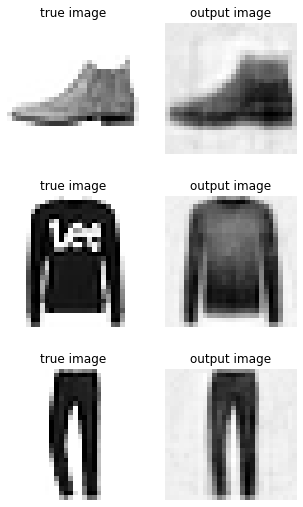

In [45]:
show_reconstructed_digits(X_test, outputs, "./my_model_all_layers.ckpt")

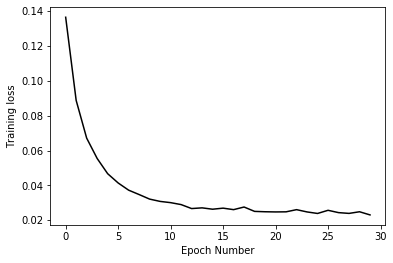

In [50]:
plt.plot(train_loss, 'k')
plt.ylabel("Training loss")
plt.xlabel("Epoch Number")
plt.savefig("4A_Training_loss.png")
plt.show()

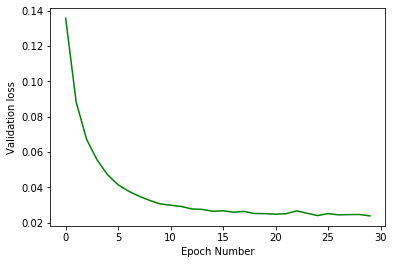

In [51]:
plt.plot(validation_loss, 'g')
plt.ylabel("Validation loss")
plt.xlabel("Epoch Number")
plt.savefig("4A_Validation_loss.png")
plt.show()

#### b Denoising Autoencoder

In [52]:
#performing the tuning of hyperparameters:
#number of hidden layers
#number of bottle_neck_units
#activation type

from functools import partial


reset_graph()
n_h = 0
n_b = 0
a_t = 0
n_hid_layers = [3,5,7]
n_bottle_neck_units = [150,200,225]  #,200] # 200] #, 225]   # all other hidden layers apart from the bottle neck layer have 300 units fixed = n_hidden1
activation_type =  [tf.nn.elu, tf.nn.relu]
learning_rate = 0.01
l2_reg = 0.0001     # L2 regularization
n_inputs = 28*28
n_hidden1 = 300
n_outputs = n_inputs

valid_loss = 50 # just some big number, won't matter as we want the lowest value

for i in range(0,len(n_hid_layers)):
    for j in range(0,len(n_bottle_neck_units)):
        for k in range(0,len(activation_type)):



            noise_level = 1.0
            X = tf.placeholder(tf.float32, shape=[None, n_inputs])
            X_noisy = X + noise_level * tf.random_normal(tf.shape(X))
            
            he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
            l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
            
            
            my_dense_layer = partial(tf.layers.dense, activation=activation_type[k], kernel_initializer = he_init, kernel_regularizer=l2_regularizer)


            n_hidden_units = np.zeros(n_hid_layers[i])
            for l in range(0,n_hid_layers[i]):
                n_hidden_units[l] = n_hidden1

            c = int((n_hid_layers[i] + 1)/2)
            n_hidden_units[c-1] = n_bottle_neck_units[j]
            n_hidden_units = n_hidden_units.astype(int)
            
            hidden1 = my_dense_layer(X_noisy, n_hidden1)
            hidden2 = my_dense_layer(hidden1, n_hidden_units[1])
            hidden3 = my_dense_layer(hidden2, n_hidden_units[2])
            g = hidden3

            if n_hid_layers[i] == 5:
                hidden4 = my_dense_layer(hidden3, n_hidden_units[3])
                hidden5 = my_dense_layer(hidden4, n_hidden_units[4])
                g = hidden5
            if n_hid_layers[i] == 7:
                hidden4 = my_dense_layer(hidden3, n_hidden_units[3])
                hidden5 = my_dense_layer(hidden4, n_hidden_units[4])
                hidden6 = my_dense_layer(hidden5, n_hidden_units[5])
                hidden7 = my_dense_layer(hidden6, n_hidden_units[6])
                g = hidden7



            outputs = my_dense_layer(g, n_outputs, activation=None)


            reconstruction_loss = tf.reduce_mean(tf.square(outputs-X))
            reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
            loss = tf.add_n([reconstruction_loss] + reg_losses)  

            # optimizer and compilation
            optimizer = tf.train.AdamOptimizer(learning_rate)
            model = optimizer.minimize(loss)   


            # Model initialization
            init = tf.global_variables_initializer()
            saver = tf.train.Saver()


            # Train model
            n_epochs = 30
            batch_size = 1000
            train_loss = []
            validation_loss = []



        with tf.Session() as sess:
            init.run()
            for epoch in range(n_epochs):
                X_train, X_validation, _,_ = train_test_split(X_trainval, Y_trainval, test_size=0.1)
                for X_batch in shuffle_batch(X_train, batch_size):
                    sess.run(model, feed_dict={X:X_batch})
                loss_train = loss.eval(feed_dict={X:X_batch})
                loss_val = loss.eval(feed_dict={X:X_validation})
                #print("\r {}".format(epoch), "Train MSE:", loss_train, "Validation MSE:", loss_val)

                sys.stdout.flush()
                saver.save(sess, "./my_model_all_layers.ckpt")
                train_loss.append(loss_train)
                validation_loss.append(loss_val)



        val_loss_temp = min(validation_loss)

        if val_loss_temp < valid_loss:

            # storing the lowest val_loss obtained through hyperparameter tuning
            valid_loss = val_loss_temp

            # storing the number of hidden layers obtained through hyperparameter tuning
            n_h = n_hid_layers[i]

            # storing the number of units in the bottle-neck layer after hyperparameter tuning 
            n_b = n_bottle_neck_units[j]

            # storing the activation type based on hyperparameter tuning
            a_t = activation_type[k]
        tf.compat.v1.reset_default_graph()




In [53]:
print('The lowest validation loss obtained through tuned hyperparameters is {}'.format(valid_loss))
print('The number of hidden layers ontained  through tuning is {}'.format(n_h))
print('The number of units in the bottle neck layer through tuning is {}'.format(n_b))
print('The activation type {}'.format(a_t))

The lowest validation loss obtained through tuned hyperparameters is 0.031627725809812546
The number of hidden layers ontained  through tuning is 3
The number of units in the bottle neck layer through tuning is 200
The activation type <function relu at 0x1a32f85830>


In [58]:
# Now using the tuned hyperparameters, coincidentally they came same as that of stacked autoencoder
# n_hid_layers = 3
#activation_type = relu
# number of units in the bottleneck layer = 200



reset_graph()

from functools import partial

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 200 #codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001     # L2 regularization
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
noise_level = 1.0
X_noisy = X + noise_level * tf.random_normal(tf.shape(X))
he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense, activation=tf.nn.relu, kernel_initializer = he_init, kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X_noisy, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation=None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs-X))
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)



In [59]:
# optimizer and compilation
optimizer = tf.train.AdamOptimizer(learning_rate)
model = optimizer.minimize(loss)

In [60]:
# Model initialization
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [61]:
# Train model
n_epochs = 30
batch_size = 1000
train_loss = []
validation_loss = []


with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_train, X_validation, _,_ = train_test_split(X_trainval, Y_trainval, test_size=0.1)
        for X_batch in shuffle_batch(X_train, batch_size):
            sess.run(model, feed_dict={X:X_batch})
        loss_train = loss.eval(feed_dict={X:X_batch})
        loss_val = loss.eval(feed_dict={X:X_validation})
        print("\r {}".format(epoch), "Train MSE:", loss_train, "Validation MSE:", loss_val)
        
        sys.stdout.flush()
        saver.save(sess, "./my_model_all_layers.ckpt")
        train_loss.append(loss_train)
        validation_loss.append(loss_val)

 0 Train MSE: 0.20114802 Validation MSE: 0.19974971
 1 Train MSE: 0.1376732 Validation MSE: 0.13649507
 2 Train MSE: 0.10084526 Validation MSE: 0.10061076
 3 Train MSE: 0.08169859 Validation MSE: 0.080891766
 4 Train MSE: 0.0669997 Validation MSE: 0.067330234
 5 Train MSE: 0.057387665 Validation MSE: 0.057242207
 6 Train MSE: 0.05059878 Validation MSE: 0.05088305
 7 Train MSE: 0.04624649 Validation MSE: 0.04621532
 8 Train MSE: 0.04250285 Validation MSE: 0.04288677
 9 Train MSE: 0.040549353 Validation MSE: 0.040355526
 10 Train MSE: 0.038698487 Validation MSE: 0.038528997
 11 Train MSE: 0.03736922 Validation MSE: 0.037460495
 12 Train MSE: 0.03506546 Validation MSE: 0.03622402
 13 Train MSE: 0.034751255 Validation MSE: 0.0350564
 14 Train MSE: 0.03442801 Validation MSE: 0.03454053
 15 Train MSE: 0.0338355 Validation MSE: 0.033681344
 16 Train MSE: 0.0340181 Validation MSE: 0.03375918
 17 Train MSE: 0.03432303 Validation MSE: 0.03301013
 18 Train MSE: 0.03339458 Validation MSE: 0.033166

In [62]:
def show_reconstructed_digits(X_test, outputs, model_path=None, n_test_digits=3):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess,model_path)
        outputs_val = sess.run(outputs, feed_dict={X:X_test})
    
    fig = plt.figure(figsize=(8,3*n_test_digits))
    
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 3, digit_index*3 + 1)
        plt.title("true image")
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 3, digit_index*3+2)
        plt.title("output image")
        plot_image(outputs_val[digit_index])

INFO:tensorflow:Restoring parameters from ./my_model_all_layers.ckpt


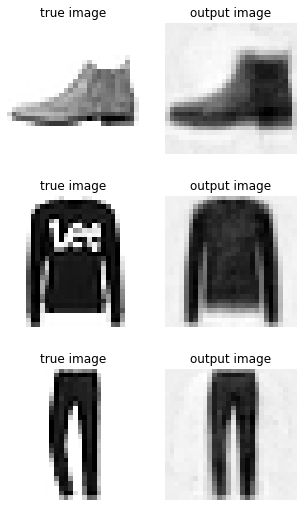

In [63]:
show_reconstructed_digits(X_test, outputs, "./my_model_all_layers.ckpt")

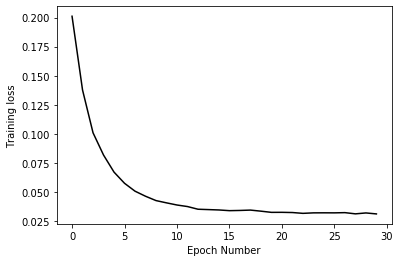

In [64]:
plt.plot(train_loss, 'k')
plt.ylabel("Training loss")
plt.xlabel("Epoch Number")
plt.savefig("4B_Training_loss.png")
plt.show()

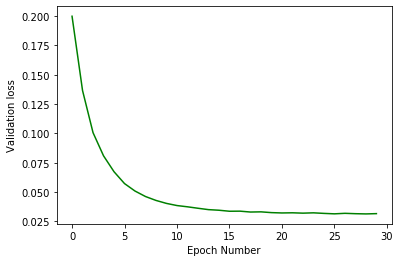

In [65]:
plt.plot(validation_loss, 'g')
plt.ylabel("Validation loss")
plt.xlabel("Epoch Number")
plt.savefig("4B_Validation_loss.png")
plt.show()


# <center>THE END
    